## Zillow Typical Home Value EDA

In [112]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
data = "Resources/atx_metro_zhvi.csv"

# Read the data
df = pd.read_csv(data)

In [113]:
# Display the DataFrame
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,190910.00,...,1017983,1019412.00,1021002,1032348,1033124,1043246.00,1055207.00,1071538.00,1086779.00,1098866.00
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,263059.00,...,496294,498967.00,501470,503881,506039,508321.00,509785.00,511825.00,513977.00,516977.00
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,264057.00,...,1116560,1116672.00,1111868,1102444,1093311,1092823.00,1090455.00,1093248.00,1095014.00,1097064.00
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,201890.00,...,344118,346566.00,349659,354152,358645,363987.00,369797.00,376594.00,383990.00,392858.00
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,353798.00,...,633123,635804.00,638691,641464,643879,647013.00,649451.00,652624.00,654942.00,658724.00


In [114]:
# Display all the different metro areas
df.Metro.unique()

array(['New York-Newark-Jersey City', 'Chicago-Naperville-Elgin',
       'Houston-The Woodlands-Sugar Land', 'El Paso', 'Austin-Round Rock',
       'San Francisco-Oakland-Hayward',
       'Nashville-Davidson--Murfreesboro--Franklin', 'The Villages',
       'Los Angeles-Long Beach-Anaheim', 'San Antonio-New Braunfels',
       'Washington-Arlington-Alexandria', 'Charlotte-Concord-Gastonia',
       'McAllen-Edinburg-Mission', 'Atlanta-Sandy Springs-Roswell',
       'Dallas-Fort Worth-Arlington', 'Clarksville', 'Oklahoma City',
       'St. Louis', 'Seattle-Tacoma-Bellevue', 'Phoenix-Mesa-Scottsdale',
       'Baltimore-Columbia-Towson',
       'Miami-Fort Lauderdale-West Palm Beach',
       'Virginia Beach-Norfolk-Newport News', 'Orlando-Kissimmee-Sanford',
       'Brownsville-Harlingen', 'Boston-Cambridge-Newton',
       'Denver-Aurora-Lakewood', 'Sacramento--Roseville--Arden-Arcade',
       'Ann Arbor', 'Cleveland-Elyria', 'Kansas City', 'Tucson',
       'Philadelphia-Camden-Wilmington',


In [115]:
# Filter Austin Metro Data
atx_df = df.loc[(df['Metro'] == 'Austin-Round Rock') & (df['CountyName'] == 'Travis County')]

# Display the DataFrame
atx_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
12,92593,12,78660,Zip,TX,TX,Pflugerville,Austin-Round Rock,Travis County,148509.00,...,296766,302081.00,308828,315890,323371,333424.00,345894.00,362049.00,379633.00,401171.00
69,92617,71,78704,Zip,TX,TX,Austin,Austin-Round Rock,Travis County,391376.00,...,684543,696437.00,710980,727402,743877,763935.00,785443.00,809473.00,835555.00,866870.00
91,92654,93,78745,Zip,TX,TX,Austin,Austin-Round Rock,Travis County,142144.00,...,382559,390205.00,399371,408735,417478,429359.00,444150.00,462314.00,481509.00,503859.00
442,92657,446,78748,Zip,TX,TX,Austin,Austin-Round Rock,Travis County,175417.00,...,344909,351346.00,359055,367311,375796,387149.00,400990.00,418559.00,437645.00,460286.00
449,92667,453,78758,Zip,TX,TX,Austin,Austin-Round Rock,Travis County,132008.00,...,360431,367778.00,376173,384096,391897,402661.00,416775.00,434829.00,454473.00,476549.00


In [116]:
# Drop columns
atx_df = atx_df.drop(['SizeRank', 'RegionType', 'StateName', 'Metro', 'State', 'CountyName'], axis=1)

# Display the DataFrame
atx_df.head()

,RegionID,RegionName,City,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
12,92593,78660,Pflugerville,148509.00,148343.00,148240.00,148141.00,148176.00,148274.00,148297.00,...,296766,302081.00,308828,315890,323371,333424.00,345894.00,362049.00,379633.00,401171.00
69,92617,78704,Austin,391376.00,387121.00,381823.00,366970.00,355854.00,349937.00,353577.00,...,684543,696437.00,710980,727402,743877,763935.00,785443.00,809473.00,835555.00,866870.00
91,92654,78745,Austin,142144.00,138735.00,136741.00,132945.00,130998.00,129124.00,128810.00,...,382559,390205.00,399371,408735,417478,429359.00,444150.00,462314.00,481509.00,503859.00
442,92657,78748,Austin,175417.00,177359.00,176921.00,177476.00,177547.00,178934.00,179648.00,...,344909,351346.00,359055,367311,375796,387149.00,400990.00,418559.00,437645.00,460286.00
449,92667,78758,Austin,132008.00,131303.00,129954.00,128120.00,126949.00,125685.00,126008.00,...,360431,367778.00,376173,384096,391897,402661.00,416775.00,434829.00,454473.00,476549.00


In [117]:
# Drop null values
atx_df = atx_df.dropna()

In [118]:
# Rename zipcode column
atx_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)

In [119]:
# View all Columns
atx_df.columns.to_list()

['RegionID',
 'Zipcode',
 'City',
 '1/31/1996',
 '2/29/1996',
 '3/31/1996',
 '4/30/1996',
 '5/31/1996',
 '6/30/1996',
 '7/31/1996',
 '8/31/1996',
 '9/30/1996',
 '10/31/1996',
 '11/30/1996',
 '12/31/1996',
 '1/31/1997',
 '2/28/1997',
 '3/31/1997',
 '4/30/1997',
 '5/31/1997',
 '6/30/1997',
 '7/31/1997',
 '8/31/1997',
 '9/30/1997',
 '10/31/1997',
 '11/30/1997',
 '12/31/1997',
 '1/31/1998',
 '2/28/1998',
 '3/31/1998',
 '4/30/1998',
 '5/31/1998',
 '6/30/1998',
 '7/31/1998',
 '8/31/1998',
 '9/30/1998',
 '10/31/1998',
 '11/30/1998',
 '12/31/1998',
 '1/31/1999',
 '2/28/1999',
 '3/31/1999',
 '4/30/1999',
 '5/31/1999',
 '6/30/1999',
 '7/31/1999',
 '8/31/1999',
 '9/30/1999',
 '10/31/1999',
 '11/30/1999',
 '12/31/1999',
 '1/31/2000',
 '2/29/2000',
 '3/31/2000',
 '4/30/2000',
 '5/31/2000',
 '6/30/2000',
 '7/31/2000',
 '8/31/2000',
 '9/30/2000',
 '10/31/2000',
 '11/30/2000',
 '12/31/2000',
 '1/31/2001',
 '2/28/2001',
 '3/31/2001',
 '4/30/2001',
 '5/31/2001',
 '6/30/2001',
 '7/31/2001',
 '8/31/2001',

In [120]:
# Restructure DataFrame
restructured_df = atx_df.melt(id_vars=["RegionID", "Zipcode", "City"], 
        var_name="Date", 
        value_name="Value")

In [121]:
# Display the restructured_df
restructured_df.head()

,RegionID,Zipcode,City,Date,Value
0,92593,78660,Pflugerville,1/31/1996,148509.00
1,92617,78704,Austin,1/31/1996,391376.00
2,92654,78745,Austin,1/31/1996,142144.00
3,92657,78748,Austin,1/31/1996,175417.00
4,92667,78758,Austin,1/31/1996,132008.00


In [122]:
# Get the columns and the rows that are not null.
restructured_df.isnull().sum()

RegionID    0
Zipcode     0
City        0
Date        0
Value       0
dtype: int64

In [123]:
# Get the unique values of each zipcode
restructured_df["Zipcode"].unique()

array([78660, 78704, 78745, 78748, 78758, 78741, 78753, 78759, 78744,
       78723, 78749, 78729, 78727, 78731, 78705, 78728, 78746, 78703,
       78750, 78738, 78734, 78735, 78754, 78653, 78752, 78724, 78747,
       78617, 78737, 78739, 78726, 78645, 78732, 78669, 78756, 78721,
       78730, 78736, 78725, 78733, 78652, 78719, 78742], dtype=int64)

In [124]:
# Explore Data types
restructured_df.dtypes

RegionID      int64
Zipcode       int64
City         object
Date         object
Value       float64
dtype: object

In [125]:
# convert the 'Date' column to datetime format
restructured_df['Date'] = pd.to_datetime(restructured_df['Date'])

# Check the format of 'Date' column
restructured_df.dtypes


RegionID             int64
Zipcode              int64
City                object
Date        datetime64[ns]
Value              float64
dtype: object

In [126]:
# Create DataFrame with home values from the past five years
condensed_df = restructured_df[(restructured_df['Date'] > "01-01-2016")]

# Get the average 'typical home value' for each zipcode
zip_avg_value = condensed_df.groupby(['Zipcode']).mean()['Value']

# Format output
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display output
zip_avg_value

Zipcode
78617    210653.21
78645    298091.15
78652    355454.73
78653    230810.27
78660    272761.08
78669    469144.98
78703    996042.27
78704    615853.11
78705    326561.53
78719    246763.73
78721    342407.21
78723    405225.18
78724    236571.00
78725    211842.00
78726    501390.94
78727    352871.89
78728    304187.97
78729    333372.39
78730    738566.97
78731    748878.98
78732    553096.20
78733    743922.48
78734    457440.67
78735    594652.82
78736    416613.17
78737    501369.68
78738    588955.95
78739    528503.83
78741    303149.70
78742    247906.42
78744    244374.61
78745    339024.14
78746   1162789.92
78747    276862.68
78748    315638.35
78749    400062.77
78750    448096.67
78752    345057.52
78753    273122.76
78754    268339.00
78756    579790.08
78758    305673.08
78759    493452.50
Name: Value, dtype: float64

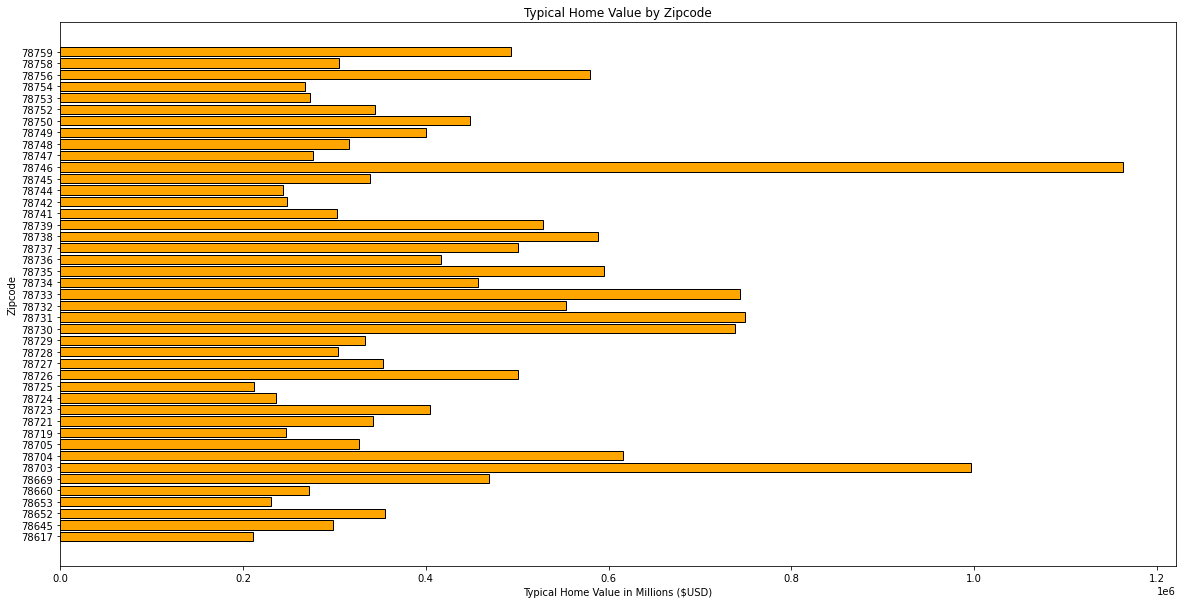

In [148]:
# Create DataFrame of average home value per zipcode
zip_avg_df = pd.DataFrame(zip_avg_value)

# Build scatterplot for zipcodes
objects = zip_avg_df.index
y_pos = np.arange(len(objects))

fig, ax = plt.subplots(figsize = (20,10))
plt.barh(y_pos, zip_avg_value, color='orange', edgecolor='black')
plt.yticks(y_pos, objects)
plt.xlabel('Typical Home Value in Millions ($USD)')
plt.ylabel('Zipcode')
plt.title('Typical Home Value by Zipcode')
plt.show()

In [151]:
# Get summary statistics
zip_avg_value.describe()

count        43.00
mean     432217.34
std      207640.82
min      210653.21
25%      287476.92
50%      352871.89
75%      514947.39
max     1162789.92
Name: Value, dtype: float64

In [ ]:
# Create pivot table with date as the index 
df = restructured_df.pivot(index='Date', columns='Zipcode', values='Value')
df

In [44]:
# Create new DataFrame that contains data from the 2001-01-01 to 2021-06-30
df = df.loc['2001-01-01' : '2021-06-30']
df

Zipcode,78617,78645,78652,78653,78660,78669,78703,78704,78705,78719,...,78747,78748,78749,78750,78752,78753,78754,78756,78758,78759
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,147754.0,194426.0,208664.0,162328.0,169337.0,285562.0,603352.0,297441.0,208865.0,156878.0,...,182600.0,176553.0,212252.0,246524.0,151260.0,138360.0,163922.0,311423.0,139140.0,271043.0
2001-02-28,147363.0,194693.0,209605.0,161953.0,169596.0,285282.0,605416.0,297333.0,209575.0,155713.0,...,183092.0,176839.0,212042.0,247595.0,150804.0,138938.0,164396.0,309739.0,139639.0,271660.0
2001-03-31,147806.0,194844.0,209063.0,162523.0,169750.0,285474.0,606977.0,296783.0,211845.0,156148.0,...,182577.0,177069.0,211830.0,247412.0,151758.0,139280.0,164921.0,309085.0,140159.0,271696.0
2001-04-30,148161.0,195414.0,207810.0,163771.0,170176.0,285353.0,608245.0,299286.0,212572.0,158025.0,...,182305.0,177411.0,212168.0,247426.0,153878.0,139786.0,165899.0,308509.0,140878.0,271948.0
2001-05-31,147842.0,195453.0,205835.0,163907.0,170421.0,284366.0,608404.0,301681.0,212966.0,159108.0,...,181099.0,177783.0,212957.0,247440.0,156044.0,140229.0,166822.0,309244.0,141654.0,272240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,259462.0,352865.0,430538.0,272288.0,333424.0,562187.0,1209588.0,763935.0,369317.0,313567.0,...,339105.0,387149.0,498796.0,554115.0,436470.0,346132.0,329288.0,716179.0,402661.0,605341.0
2021-03-31,269425.0,365510.0,444832.0,282137.0,345894.0,579399.0,1242810.0,785443.0,375755.0,326081.0,...,352046.0,400990.0,517665.0,574389.0,449982.0,359115.0,341338.0,735894.0,416775.0,625012.0
2021-04-30,282099.0,380770.0,462992.0,295001.0,362049.0,600653.0,1282939.0,809473.0,383597.0,341784.0,...,368691.0,418559.0,540776.0,599954.0,467679.0,375080.0,356839.0,757599.0,434829.0,650562.0


In [45]:
# Resample data to get the mean typical home value for each year
df = df.resample("Y").mean()
df


Zipcode,78617,78645,78652,78653,78660,78669,78703,78704,78705,78719,...,78747,78748,78749,78750,78752,78753,78754,78756,78758,78759
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,146166.666667,195669.583333,205384.583333,165241.750000,170782.500000,285038.500000,6.012242e+05,301245.666667,208447.166667,155775.250000,...,181287.916667,178412.250000,213440.666667,246802.416667,154507.166667,140483.750000,167116.416667,310405.333333,142113.500000,272881.250000
2002-12-31,148525.750000,196634.583333,200552.416667,168507.250000,172850.250000,287108.083333,5.522752e+05,297288.500000,206171.750000,158665.083333,...,180328.500000,180880.750000,213789.750000,246322.166667,147731.666667,144252.500000,171615.583333,310141.583333,144041.666667,272363.250000
2003-12-31,149130.000000,193016.750000,203458.916667,163540.000000,171094.416667,286580.416667,5.188962e+05,294298.833333,209460.916667,153886.333333,...,180520.666667,181315.416667,213307.583333,244565.833333,149613.083333,143639.250000,171822.166667,298552.666667,142312.333333,270976.250000
2004-12-31,143773.500000,199522.833333,203231.750000,170997.750000,172897.666667,299994.083333,5.617172e+05,304353.500000,211873.583333,140413.000000,...,184147.000000,185432.833333,216873.166667,248047.583333,151624.500000,143635.000000,172384.166667,312598.083333,143530.500000,276875.166667
2005-12-31,148197.333333,208141.083333,217347.250000,180569.000000,176307.000000,320625.500000,5.880016e+05,327523.500000,218629.000000,142686.333333,...,188710.750000,189876.000000,221840.500000,253819.083333,155478.833333,147210.083333,178319.250000,334747.666667,147958.083333,285441.250000
2006-12-31,147767.583333,218407.000000,222579.500000,184904.083333,179303.916667,351478.416667,6.195951e+05,347355.083333,223018.583333,149194.250000,...,190462.333333,192053.916667,225839.000000,265989.583333,162751.500000,152422.916667,184818.416667,341794.500000,151991.666667,297801.083333
2007-12-31,154776.500000,233196.833333,224559.583333,189817.916667,184436.416667,377258.833333,6.487612e+05,362289.916667,235007.166667,162980.583333,...,197626.833333,199556.500000,238208.166667,276747.916667,174746.666667,158110.416667,191481.000000,357898.083333,157256.083333,313112.666667
2008-12-31,150597.666667,233691.166667,233593.000000,180558.750000,187631.500000,371329.000000,6.535887e+05,367550.333333,240058.000000,160403.916667,...,200456.666667,204131.666667,245002.833333,284106.666667,182944.916667,159863.166667,193673.333333,366163.583333,158424.583333,322573.583333
2009-12-31,142162.416667,222440.916667,224331.916667,163684.916667,180242.083333,354046.833333,6.173324e+05,345956.750000,223238.583333,148359.750000,...,189809.750000,198946.750000,236202.333333,278321.750000,178583.500000,154264.666667,181662.166667,354863.083333,151988.416667,309383.000000


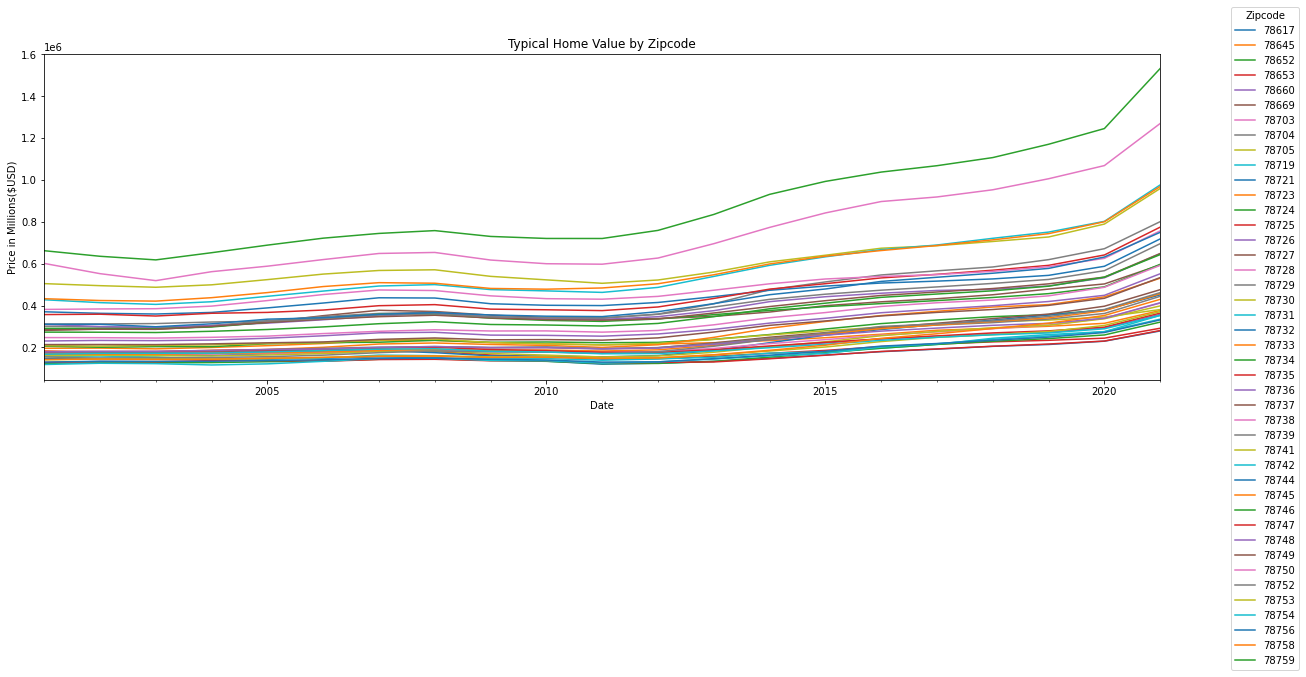

In [46]:
# Plot the DataFrame
df.plot(figsize = (20,6))

# Add title and label axis
plt.title("Typical Home Value by Zipcode")
plt.ylabel('Price in Millions($USD)')
plt.xlabel("Date")
#plt.legend(title='Zipcode', loc=8)
plt.legend(title='Zipcode', bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)